Colab link: https://colab.research.google.com/drive/1fi6ZSG2ToG_hIYxX0t8o12jLsTDDIdUb?usp=sharing

In [138]:
from typing import Tuple
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

First, load the image and get the corresponding numpy array, as well as the maximum gray intensity allowed.

In [139]:
def load_image(path : str) -> Tuple[np.array, int]:
  image = np.array(Image.open(path))
  t = image.dtype
  max_intensity = np.iinfo(t).max

  print(f"Image loaded with dimensions {image.shape[0]}x{image.shape[1]}.\
 Gray levels are of type {t} in range [0, {max_intensity}].")
  return image, max_intensity + 1

In [140]:
image, L = load_image("../Images/Ch3/Fig0316(4)(bottom_left).tif")

Image loaded with dimensions 500x500. Gray levels are of type uint8 in range [0, 255].


Get absolute and relative frequencies of gray levels and show them in a histogram.

In [141]:
def get_frequencies(image : np.array, max_intens) -> Tuple[np.array, np.array]:
  abs_freq = np.zeros(max_intens, dtype=int)
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      abs_freq[image[x,y]] += 1
  probabilities = abs_freq / (image.shape[0] * image.shape[1])

  return abs_freq, probabilities

In [142]:
def show_frequencies(abs_freq, rel_freq, size=(8,4)):
  fig, axs = plt.subplots(1, 2, figsize=size)
  freqs = [abs_freq, rel_freq]
  labels = ["Absolute frequency", "Relative frequency"]
  for idx, (freq, label) in enumerate(zip(freqs, labels)):
    for i, val in enumerate(freq):
      axs[idx].vlines(i, 0, val)
    axs[idx].set_ylim(0, max(freq))
    axs[idx].set_xlabel("Gray level")
    axs[idx].set_ylabel(label)
  plt.tight_layout()
  plt.show()

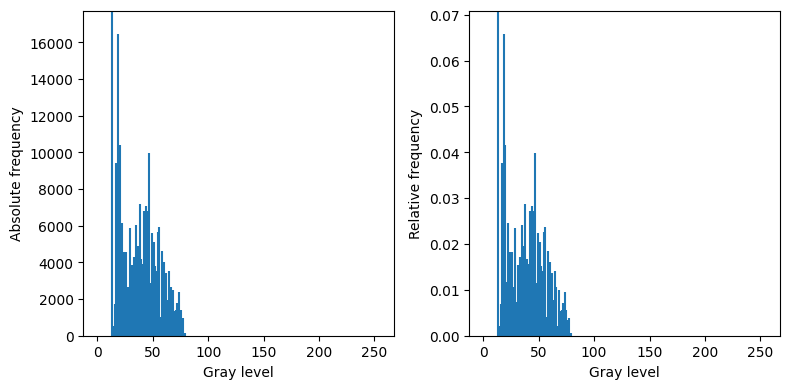

In [144]:
original_abs, original_prob = get_frequencies(image, L)
show_frequencies(original_abs, original_prob)

Define the pixel-by-pixel transformation

$$s_k = T(r_k) = \text{round}((L-1)\sum _{j=0}^{k} p_r(r_j))$$

and apply it to the original desired image.

In [145]:
def equalizer(probabilities : np.array, intensity, max_intens) :
  sum_ = sum(probabilities[0 : intensity + 1])
  return round((max_intens - 1) * sum_)

In [146]:
def equalized_img(img : np.array, probs, max_intens, img_type=np.uint8) -> np.array:
  equalized = np.empty((img.shape[0], img.shape[1]), dtype=img_type)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      equalized[i,j]=equalizer(probs, img[i,j], max_intens)
  return equalized

In [147]:
equalized = equalized_img(image, original_prob, L)

array([[ 18,  18,  18, ..., 115, 115, 103],
       [ 18,  18,  18, ..., 112, 112,  97],
       [ 18,  18,  18, ...,  91,  91,  80],
       ...,
       [ 49,  18,  18, ..., 219, 213, 213],
       [ 59,  19,  18, ..., 213, 213, 198],
       [ 68,  32,  18, ..., 207, 207, 182]], dtype=uint8)
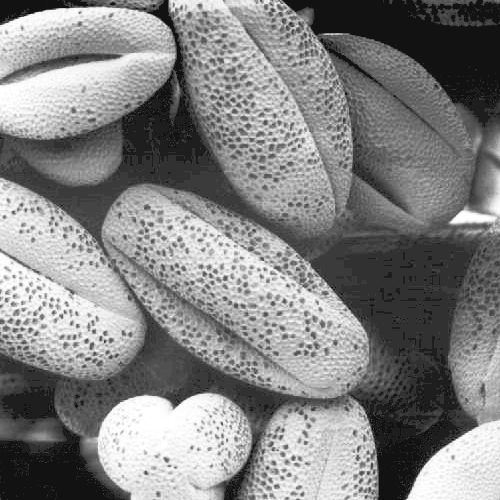

In [148]:
equalized

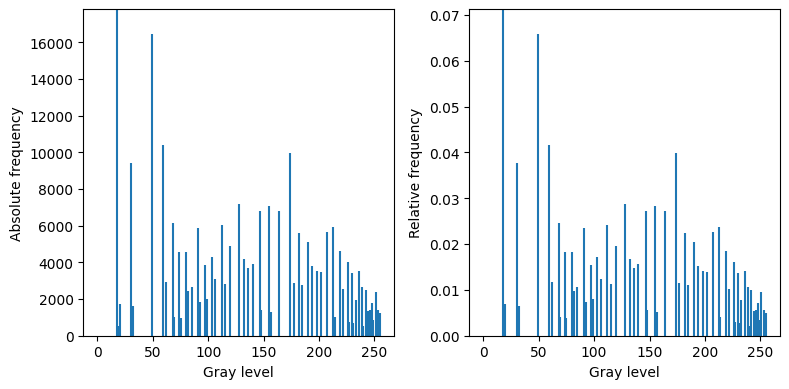

In [150]:
final_abs, final_prob = get_frequencies(equalized, L)
show_frequencies(final_abs, final_prob)